### Imports

In [1]:
import pandas as pd
import cufflinks as cf
import matplotlib.pyplot as plt
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)
import pandas as pd
import missingno as msno
from matplotlib.pyplot import figure

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip install pyreadr
import pyreadr

### Reading initial data

In [ ]:
result = pyreadr.read_r('stocks.rds') # also works for RData
df = result[None] 
df=pd.DataFrame(df)
msno.matrix(df)

#### no non-numerical value,missing data might be zeroes where they dont make sense, to be handled when encountered.


In [ ]:
df.head()

### Further imports

In [8]:
import pyreadr
import pandas as pd
import cufflinks as cf
import matplotlib.pyplot as plt
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)
import pandas as pd
import missingno as msno
from matplotlib.pyplot import figure
import pyreadr
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
!pip install xgboost
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
!pip install fast_ml
!pip install tqdm
from fast_ml.model_development import train_valid_test_split
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [3]:
init_notebook_mode(connected=True)

# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reducing the data

In [ ]:
df['date']=pd.to_datetime(df['date'])
df=df[df['date']>pd.to_datetime('2012-01-01')]

### Reading in the small data

In [4]:
df=pd.read_csv('stock small.csv')
df=df[df['ticker']!='acmr']
df=df[df['ticker']!='alna']
df=df[df['ticker']!='altr']
df=df[df['ticker']!='apls']
df=df[df['ticker']!='aqua']
df=df[df['ticker']!='band']

### Imports for technical indicators

In [5]:
!pip install ta
from ta import add_all_ta_features
from ta.momentum import WilliamsRIndicator,UltimateOscillator,TSIIndicator,StochasticOscillator,StochRSIIndicator,RSIIndicator,ROCIndicator,AwesomeOscillatorIndicator,PercentageVolumeOscillator,PercentagePriceOscillator,KAMAIndicator
from ta.volume import VolumeWeightedAveragePrice,VolumePriceTrendIndicator,OnBalanceVolumeIndicator,NegativeVolumeIndexIndicator,MFIIndicator,ForceIndexIndicator,EaseOfMovementIndicator,ChaikinMoneyFlowIndicator,AccDistIndexIndicator
from ta.volatility import AverageTrueRange,BollingerBands,UlcerIndex
from ta.trend import ADXIndicator

You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [13]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

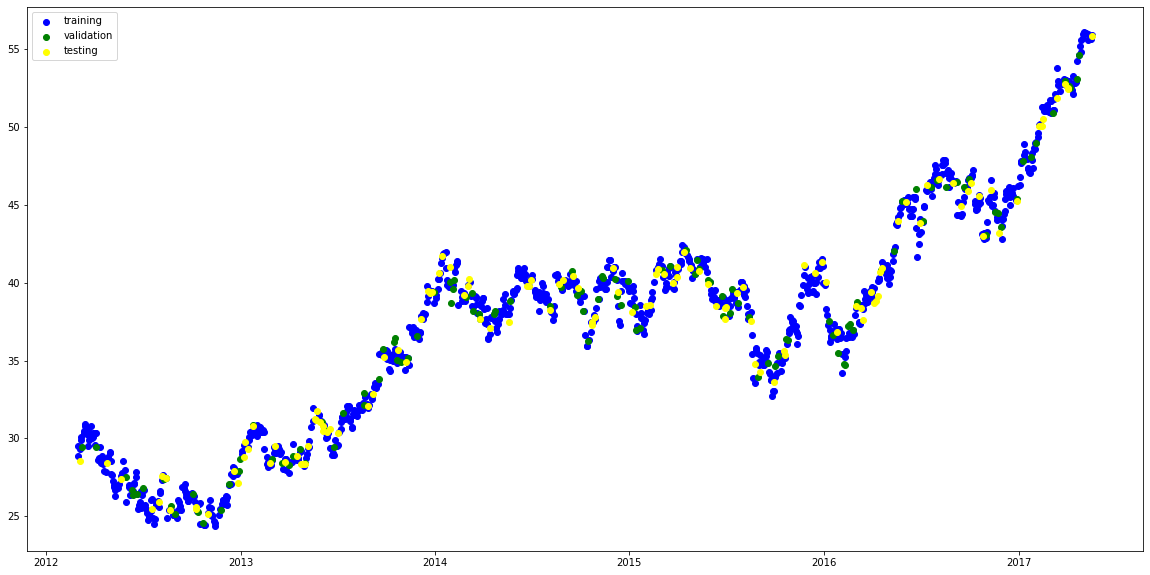

Best params: {'gamma': 0.02, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200}
Best validation score = 0.9923824032262679
y_true = [40.579 43.182 43.919 35.363 52.397 32.877 45.254 40.746 34.897 41.673
 34.255 37.671 25.592 39.378 51.86  40.018 27.395 37.501 41.975 25.899
 39.329 50.051 28.847 39.187 37.692 31.275 31.077 33.638 40.89  41.125
 50.499 38.515 30.774 38.518 40.338 45.188 39.881 39.645 27.918 29.35
 30.447 39.17  40.241 46.237 28.779 34.801 52.487 35.646 28.512 32.089
 30.418 40.913 50.022 38.687 28.408 46.415 31.747 28.36  38.231 40.569
 40.187 39.892 27.155 39.434 27.469 28.334 28.537 40.415 40.993 25.418
 40.173 39.324 31.17  37.805 38.089 52.763 25.165 38.356 40.956 38.568
 29.776 29.487 27.581 39.793 42.965 37.065 38.455 30.326 28.451 25.444
 45.927 43.826 37.258 37.68  30.803 28.347 45.852 46.381 40.705 39.684
 38.337 55.842 39.798 39.806 40.983 38.833 36.856 29.509 37.518 39.392
 37.622 40.913 46.662 38.515 40.596 30.634]
y_pred = [40.050964 43.87074  44.85

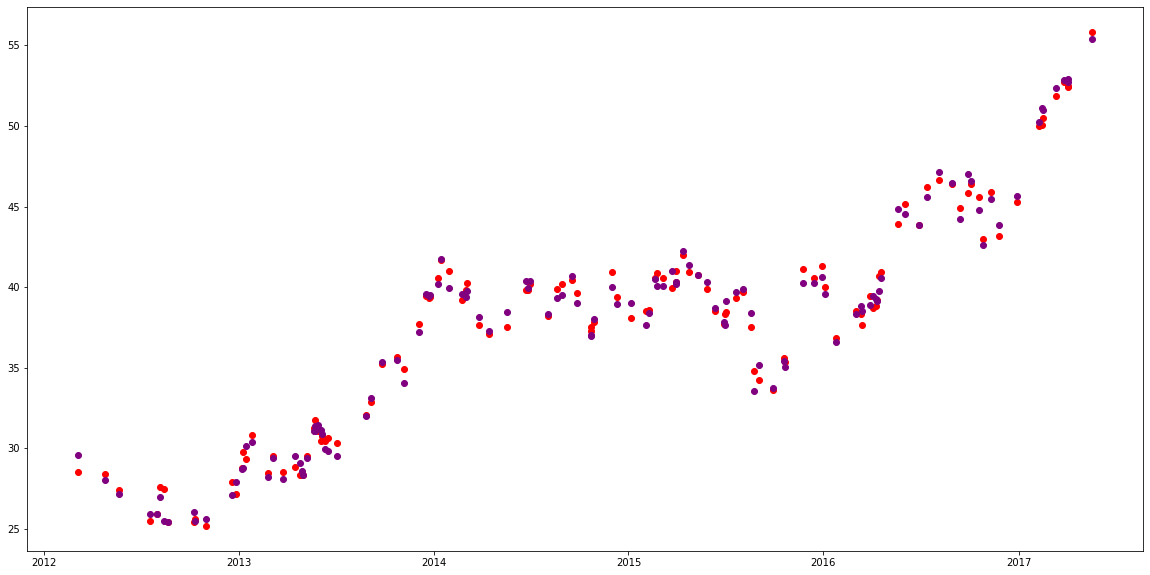

In [24]:
imp_dict={}


tickers=df.groupby('ticker')

for i in range(1):#list(tickers.groups.keys()):
    #print(i)
    cols=['close', 'awesome', 'kama', 'ppo', 'ppo hist', 'ppo signal', 'pvo', 'pvo hist', 'pvo signal', 'roc', 'rsi', 'srsi', 'srsi d', 'srsi k', 'so', 'so signal', 'tsi', 'uo', 'wr', 'adi', 'cmf', 'eom', 'eom signal', 'fi', 'mfi', 'obv', 'vpt', 'vwa', 'bhb', 'bhbi', 'blb', 'blbi', 'bm', 'bpb', 'bwb', 'ui','EMA_9','SMA_5','SMA_10','SMA_15','SMA_30','MACD','MACD_signal']
    for j in cols:
        imp_dict[j]=0
        
    ticker_df=tickers.get_group('a')
    ticker_df=ticker_df.drop(['Unnamed: 0','ticker'],axis=1)
    #ticker_df=ticker_df.set_index('date')
    
    max1=ticker_df['open'].quantile(0.999)
    ticker_df=ticker_df[ticker_df['open']<max1]
    min1=ticker_df['open'].quantile(0.001)
    ticker_df=ticker_df[ticker_df['open']>min1]
    
    max1=ticker_df['high'].quantile(0.999)
    ticker_df=ticker_df[ticker_df['high']<max1]
    min1=ticker_df['high'].quantile(0.001)
    ticker_df=ticker_df[ticker_df['high']>min1]
    
    max1=ticker_df['low'].quantile(0.999)
    ticker_df=ticker_df[ticker_df['low']<max1]
    min1=ticker_df['low'].quantile(0.001)
    ticker_df=ticker_df[ticker_df['low']>min1]
    
    max1=ticker_df['close'].quantile(0.999)
    ticker_df=ticker_df[ticker_df['close']<max1]
    min1=ticker_df['close'].quantile(0.001)
    ticker_df=ticker_df[ticker_df['close']>min1]
    
    max1=ticker_df['volume'].quantile(0.999)
    ticker_df=ticker_df[ticker_df['volume']<max1]
    min1=ticker_df['volume'].quantile(0.001)
    ticker_df=ticker_df[ticker_df['volume']>min1]
    
    ##outliers via iqr method
    iqr1=ticker_df['open'].quantile(0.75)-ticker_df['open'].quantile(0.25)
    ticker_df=ticker_df[ticker_df['open']<ticker_df['open'].quantile(0.75)+1.5*iqr1]
    ticker_df=ticker_df[ticker_df['open']>ticker_df['open'].quantile(0.25)-1.5*iqr1]
    
    iqr1=ticker_df['high'].quantile(0.75)-ticker_df['high'].quantile(0.25)
    ticker_df=ticker_df[ticker_df['high']<ticker_df['high'].quantile(0.75)+1.5*iqr1]
    ticker_df=ticker_df[ticker_df['high']>ticker_df['high'].quantile(0.25)-1.5*iqr1]
    
    iqr1=ticker_df['low'].quantile(0.75)-ticker_df['low'].quantile(0.25)
    ticker_df=ticker_df[ticker_df['low']<ticker_df['low'].quantile(0.75)+1.5*iqr1]
    ticker_df=ticker_df[ticker_df['low']>ticker_df['low'].quantile(0.25)-1.5*iqr1]
    
    iqr1=ticker_df['close'].quantile(0.75)-ticker_df['close'].quantile(0.25)
    ticker_df=ticker_df[ticker_df['close']<ticker_df['close'].quantile(0.75)+1.5*iqr1]
    ticker_df=ticker_df[ticker_df['close']>ticker_df['close'].quantile(0.25)-1.5*iqr1]
    
    iqr1=ticker_df['volume'].quantile(0.75)-ticker_df['volume'].quantile(0.25)
    ticker_df=ticker_df[ticker_df['volume']<ticker_df['volume'].quantile(0.75)+1.5*iqr1]
    ticker_df=ticker_df[ticker_df['volume']>ticker_df['volume'].quantile(0.25)-1.5*iqr1]
    
    ## 11 momentum indicators
    awe=AwesomeOscillatorIndicator(ticker_df['high'],ticker_df['low'])
    kama=KAMAIndicator(ticker_df['close'])
    ppo=PercentagePriceOscillator(ticker_df['close'])
    pvo=PercentageVolumeOscillator(ticker_df['volume'])
    roc=ROCIndicator(ticker_df['close'])
    rsi=RSIIndicator(ticker_df['close'])
    srsi=StochRSIIndicator(ticker_df['close'])
    so=StochasticOscillator(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    tsi=TSIIndicator(ticker_df['close'])
    uo=UltimateOscillator(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    wr=WilliamsRIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    ## 9 volume indicators
    adi=AccDistIndexIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'],ticker_df['volume'])
    cmf=ChaikinMoneyFlowIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'],ticker_df['volume'])
    eom=EaseOfMovementIndicator(ticker_df['high'],ticker_df['low'],ticker_df['volume'])
    fi=ForceIndexIndicator(ticker_df['close'],ticker_df['volume'])
    mfi=MFIIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'],ticker_df['volume'])
    #nvi=NegativeVolumeIndexIndicator(ticker_df['close'],ticker_df['volume'])
    obv=OnBalanceVolumeIndicator(ticker_df['close'],ticker_df['volume'])
    vpt=VolumePriceTrendIndicator(ticker_df['close'],ticker_df['volume'])
    vwa=VolumeWeightedAveragePrice(ticker_df['high'],ticker_df['low'],ticker_df['close'],ticker_df['volume'])
    ## volatility indicators
    #atr=AverageTrueRange(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    bb=BollingerBands(ticker_df['close'])
    ui=UlcerIndex(ticker_df['close'])
    ## Trend Indicators.
    #adx=ADXIndicator(ticker_df['high'],ticker_df['low'],ticker_df['close'])
    
    ## 11 momentum indicators
    ticker_df['awesome']=awe.awesome_oscillator().astype(np.float64)
    ticker_df['kama']=kama.kama().astype(np.float64)
    ticker_df['ppo']=ppo.ppo().astype(np.float64)
    ticker_df['ppo hist']=ppo.ppo_hist().astype(np.float64)
    ticker_df['ppo signal']=ppo.ppo_signal().astype(np.float64)
    ticker_df['pvo']=pvo.pvo().astype(np.float64)
    ticker_df['pvo hist']=pvo.pvo_hist().astype(np.float64)
    ticker_df['pvo signal']=pvo.pvo_signal().astype(np.float64)
    ticker_df['roc']=roc.roc().astype(np.float64)
    ticker_df['rsi']=rsi.rsi().astype(np.float64)
    ticker_df['srsi']=srsi.stochrsi().astype(np.float64)
    ticker_df['srsi d']=srsi.stochrsi_d().astype(np.float64)
    ticker_df['srsi k']=srsi.stochrsi_k().astype(np.float64)
    ticker_df['so']=so.stoch().astype(np.float64)
    ticker_df['so signal']=so.stoch_signal().astype(np.float64)
    ticker_df['tsi']=tsi.tsi().astype(np.float64)
    ticker_df['uo']=uo.ultimate_oscillator().astype(np.float64)
    ticker_df['wr']=wr.williams_r().astype(np.float64)
    ## 9 volume indicators
    ticker_df['adi']=adi.acc_dist_index().astype(np.float64)
    ticker_df['cmf']=cmf.chaikin_money_flow().astype(np.float64)
    ticker_df['eom']=eom.ease_of_movement().astype(np.float64)
    ticker_df['eom signal']=eom.sma_ease_of_movement().astype(np.float64)
    ticker_df['fi']=fi.force_index().astype(np.float64)
    ticker_df['mfi']=mfi.money_flow_index().astype(np.float64)
    #ticker_df['nvi']=nvi.negative_volume_index().astype(np.float64)
    ticker_df['obv']=obv.on_balance_volume().astype(np.float64)
    ticker_df['vpt']=vpt.volume_price_trend().astype(np.float64)
    ticker_df['vwa']=vwa.volume_weighted_average_price().astype(np.float64)
    ## volatility indicators
    ticker_df['bhb']=bb.bollinger_hband().astype(np.float64)
    ticker_df['bhbi']=bb.bollinger_hband_indicator().astype(np.float64)
    ticker_df['blb']=bb.bollinger_lband().astype(np.float64)
    ticker_df['blbi']=bb.bollinger_lband_indicator().astype(np.float64)
    ticker_df['bm']=bb.bollinger_mavg().astype(np.float64)
    ticker_df['bpb']=bb.bollinger_pband().astype(np.float64)
    ticker_df['bwb']=bb.bollinger_wband().astype(np.float64)
    ticker_df['ui']=ui.ulcer_index().astype(np.float64)
    ticker_df['EMA_9'] = ticker_df['close'].ewm(9).mean().shift()
    ticker_df['SMA_5'] = ticker_df['close'].rolling(5).mean().shift()
    ticker_df['SMA_10'] = ticker_df['close'].rolling(10).mean().shift()
    ticker_df['SMA_15'] = ticker_df['close'].rolling(15).mean().shift()
    ticker_df['SMA_30'] = ticker_df['close'].rolling(30).mean().shift()
    EMA_12 = pd.Series(ticker_df['close'].ewm(span=12, min_periods=12).mean())
    EMA_26 = pd.Series(ticker_df['close'].ewm(span=26, min_periods=26).mean())
    ticker_df['MACD'] = pd.Series(EMA_12 - EMA_26)
    ticker_df['MACD_signal'] = pd.Series(ticker_df.MACD.ewm(span=9, min_periods=9).mean())
    ticker_df['close'] = ticker_df['close'].shift(-1)
    
    ticker_df = ticker_df.iloc[35:] # Because of moving averages and MACD line
    ticker_df = ticker_df[:-1]      # Because of shifting close price

    ticker_df=ticker_df.drop(['open','high','low','volume'],1)
    ticker_df['close']=ticker_df['close'].astype(np.float64)
    
    cols=list(ticker_df.columns)
    cols.remove('date')
    date=ticker_df['date']
    
    ticker_df=ticker_df.fillna(0)
    ticker_df['date']=date
    ticker_df['date']=pd.to_datetime(ticker_df['date'])

    xtrain=ticker_df[ticker_df['date']<pd.to_datetime('2016-01-01')]
    ytrain=xtrain['close']
    xtrain=xtrain.drop(['close','date'],1)
    
    xtest=ticker_df[ticker_df['date']>pd.to_datetime('2016-01-01')]
    ytest=xtest['close']
    xtest=xtest.drop(['close','date'],1)
    
    rnd=RandomForestRegressor(n_estimators=500,n_jobs=-1)
    rnd.fit(xtrain,ytrain)
       
    for name,score in zip(cols,rnd.feature_importances_):
        imp_dict[name]=imp_dict[name]+score
    
    for k in imp_dict.keys():
        if k=='close':
            continue
        if imp_dict[k]<0.0009:
            ticker_df=ticker_df.drop([k],1) 
    
    X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(ticker_df, target = 'close', train_size=0.8, valid_size=0.1, test_size=0.1)
    
    traindate=X_train['date']
    validdate=X_valid['date']
    testdate=X_test['date']
    X_train=X_train.drop(['date'],1)
    X_valid=X_valid.drop(['date'],1)
    X_test=X_test.drop(['date'],1)
    
    plt.scatter(traindate,y_train,c ="blue",label='training')
    plt.scatter(validdate,y_valid,c ="green",label='validation')
    plt.scatter(testdate,y_test,c ="yellow",label='testing')
    plt.legend()
    plt.show()

    parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02]
    }

    eval_set = [(X_train, y_train), (X_valid, y_valid)]
    model = xgb.XGBRegressor(objective='reg:squarederror')
    clf = GridSearchCV(model, parameters)

    clf.fit(X_train, y_train)

    print(f'Best params: {clf.best_params_}')
    print(f'Best validation score = {clf.best_score_}')
    
    
    model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
    model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    
    y_pred = model.predict(X_test)
    print(f'y_true = {np.array(y_test)[10:]}')
    print(f'y_pred = {y_pred[10:]}')
    
    print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

    plt.scatter(testdate,y_test,c='red')
    plt.scatter(testdate,y_pred,c='purple')
    plt.show()
